In [1]:
!pip install sportypy

In [2]:
from sportypy.surfaces.basketball import WNBACourt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
wnba_2018_df = pd.read_csv('Data/wnba_pbp_2018.csv')
wnba_2019_df = pd.read_csv('Data/wnba_pbp_2019.csv')
wnba_2020_df = pd.read_csv('Data/wnba_pbp_2020.csv')
wnba_2021_df = pd.read_csv('Data/wnba_pbp_2021.csv')
wnba_2022_df = pd.read_csv('Data/wnba_pbp_2022.csv')
wnba_2023_df = pd.read_csv('Data/wnba_pbp_2023.csv')
wnba_2024_df = pd.read_csv('Data/wnba_pbp_2024.csv')

In [4]:
merged_pbp_df = pd.concat([wnba_2018_df, 
                       wnba_2019_df, 
                       wnba_2020_df,
                       wnba_2021_df, 
                       wnba_2022_df, 
                       wnba_2023_df,
                       wnba_2024_df], ignore_index=True)

In [5]:
merged_pbp_df

,Unnamed: 0,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_game_half,coordinate_x,coordinate_y,game_date,game_date_time,type_abbreviation,home_timeout_called,away_timeout_called,lead_half,lag_half
0,1,4010796954,4,615,Jumpball,Breanna Stewart vs. LaToya Sanders (Elena Dell...,0,0,1,1st Quarter,...,NaN,4.675000e+01,-25,2018-09-12,2018-09-12 20:00:00,NaN,NaN,NaN,NaN,NaN
1,2,4010796957,7,20132,Step Back Jump Shot,Kristi Toliver makes 18-foot step back jumpsho...,0,2,1,1st Quarter,...,1.0,3.075000e+01,14,2018-09-12,2018-09-12 20:00:00,NaN,NaN,NaN,NaN,NaN
2,3,4010796959,9,12,Kicked Ball,LaToya Sanders kicked ball violation,0,2,1,1st Quarter,...,1.0,4.675000e+01,-25,2018-09-12,2018-09-12 20:00:00,NaN,NaN,NaN,NaN,NaN
3,4,40107969510,10,30092,Jump Shot,Sue Bird misses 29-foot three point jumper,0,2,1,1st Quarter,...,1.0,-1.575000e+01,-14,2018-09-12,2018-09-12 20:00:00,NaN,NaN,NaN,NaN,NaN
4,5,40107969511,11,156,Offensive Rebound,Seattle offensive team rebound,0,2,1,1st Quarter,...,1.0,-1.575000e+01,-14,2018-09-12,2018-09-12 20:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514059,12529,401620221574,574,584,Substitution,Taylor Soule enters the game for Kayla McBride,83,68,4,4th Quarter,...,NaN,-2.147484e+08,-214748365,2024-05-14,2024-05-14 22:00:00,NaN,False,False,2.0,2.0
514060,12530,401620221575,575,584,Substitution,Alissa Pili enters the game for Napheesa Collier,83,68,4,4th Quarter,...,NaN,-2.147484e+08,-214748365,2024-05-14,2024-05-14 22:00:00,NaN,False,False,2.0,2.0
514061,12531,401620221585,585,92,Jump Shot,Mercedes Russell makes 10-foot jumper (Sami Wh...,83,70,4,4th Quarter,...,NaN,3.075000e+01,1,2024-05-14,2024-05-14 22:00:00,NaN,False,False,2.0,2.0
514062,12532,401620221587,587,412,End Period,End of the 4th Quarter,83,70,4,4th Quarter,...,NaN,-2.147484e+08,-214748365,2024-05-14,2024-05-14 22:00:00,NaN,False,False,2.0,2.0


# Looking at Distribution of Values for Various Columns

Defensive Rebound                 75628
Jump Shot                         64355
Substitution                      61907
Offensive Rebound                 36271
Pullup Jump Shot                  20173
                                  ...  
ReverseDunkShot                       1
Swinging Elbows Turnover              1
Free Throw Flagrant 1 of 1            1
NoShot                                1
Offensive Goaltending Turnover        1
Name: type_text, Length: 203, dtype: int64


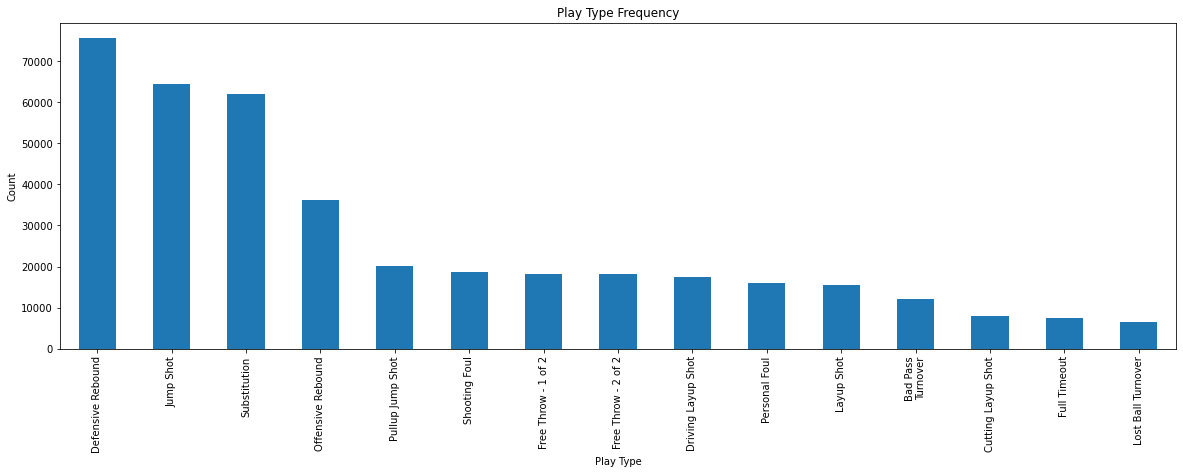

In [6]:
type_text_counts = merged_pbp_df['type_text'].value_counts().sort_values(ascending=False)

print(type_text_counts)

plt.figure(figsize=(20, 6))
type_text_counts.head(15).plot(kind='bar')
plt.title('Play Type Frequency')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

False    396031
True     118033
Name: scoring_play, dtype: int64


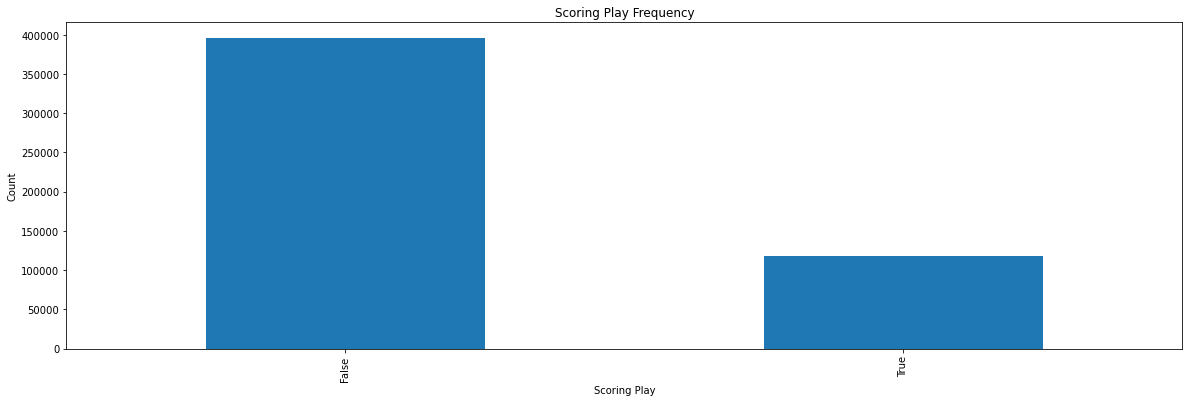

In [7]:
scoring_play_counts = merged_pbp_df['scoring_play'].value_counts().sort_values(ascending=False)

print(scoring_play_counts)

plt.figure(figsize=(20, 6))
scoring_play_counts.plot(kind='bar')
plt.title('Scoring Play Frequency')
plt.xlabel('Scoring Play')
plt.ylabel('Count')
plt.show()

2023    102191
2022     93166
2018     84811
2019     84517
2021     80485
2020     56361
2024     12533
Name: season, dtype: int64


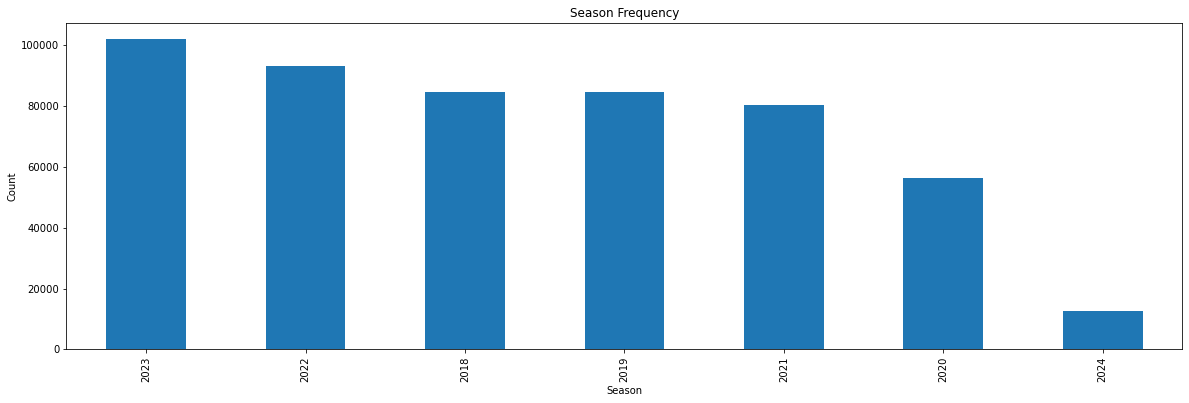

In [8]:
season_counts = merged_pbp_df['season'].value_counts().sort_values(ascending=False)

print(season_counts)

plt.figure(figsize=(20, 6))
season_counts.plot(kind='bar')
plt.title('Season Frequency')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [9]:
game_df = merged_pbp_df[['game_id']]
game_df = game_df.drop_duplicates(subset=['game_id'])
game_df

,game_id
0,401079695
357,401079694
732,401079693
1055,401074465
1426,401074464
...,...
512040,401620223
512452,401620178
512860,401620219
513249,401620220


In [10]:
home_fave_counts = merged_pbp_df['home_favorite'].value_counts().sort_values(ascending=False)

print(home_fave_counts)

True    514064
Name: home_favorite, dtype: int64


In [11]:
home_team_spread_counts = merged_pbp_df['home_team_spread'].value_counts().sort_values(ascending=False)

print(home_team_spread_counts)

2.5    514064
Name: home_team_spread, dtype: int64


In [12]:
game_spread_counts = merged_pbp_df['game_spread'].value_counts().sort_values(ascending=False)

print(game_spread_counts)

2.5    514064
Name: game_spread, dtype: int64


In [13]:
game_spread_available_counts = merged_pbp_df['game_spread_available'].value_counts().sort_values(ascending=False)

print(game_spread_available_counts)

False    514064
Name: game_spread_available, dtype: int64


In [14]:
type_abbreviation_counts = merged_pbp_df['type_abbreviation'].value_counts()

print(type_abbreviation_counts)

Series([], Name: type_abbreviation, dtype: int64)


# Removing Columns That Aren't Useful

In [15]:
merged_pbp_df.shape

(514064, 65)

In [16]:
merged_pbp_df = merged_pbp_df.drop(columns=['home_favorite', 'home_team_spread', 'game_spread', 'game_spread_available', 'type_abbreviation'])

In [17]:
merged_pbp_df.shape

(514064, 60)

# Looking at Clutch Time Shots (min. 50 shots attempted)

## Clutch Time = Less than 5 minutes left in game

In [18]:
clutch_time_df = merged_pbp_df[merged_pbp_df['end_game_seconds_remaining'] < 300]
clutch_time_df = clutch_time_df[clutch_time_df['shooting_play'] == True]
clutch_time_df = clutch_time_df[clutch_time_df['type_text'].str.contains('shot', case=False)]

In [19]:
clutch_time_df['type_text'].value_counts()

Jump Shot                             8114
Pullup Jump Shot                      2440
Driving Layup Shot                    2254
Layup Shot                            1916
Cutting Layup Shot                     917
Layup Shot Putback                     672
Running Layup Shot                     586
Step Back Jump Shot                    558
Turnaround Jump Shot                   557
Three Point Jump Shot                  457
Driving Floating Jump Shot             436
JumpShot                               316
Floating Jump Shot                     249
Fade Away Jump Shot                    234
Running Jump Shot                      195
Driving Lay Up Shot                    172
LayUpShot                              165
Turnaround Fade Away Jump Shot         151
Hook Shot                              146
Running Pullup Jump Shot               142
Reverse Layup Shot                     130
Turnaround Hook Shot                   126
Tip Shot                               113
Driving Flo

In [20]:
clutch_time_df = clutch_time_df[['athlete_id_1', 'scoring_play']]

In [21]:
clutch_score_made_counts = clutch_time_df['scoring_play'].value_counts().sort_values(ascending=False)

print(clutch_score_made_counts)

False    12612
True      9017
Name: scoring_play, dtype: int64


In [22]:
clutch_player_counts = clutch_time_df['athlete_id_1'].value_counts().sort_values(ascending=False)

print(clutch_player_counts)

3904577.0    484
2987869.0    422
2998928.0    388
869.0        369
2987891.0    362
            ... 
3054119.0      1
5105752.0      1
5209660.0      1
4398907.0      1
4433661.0      1
Name: athlete_id_1, Length: 317, dtype: int64


In [23]:
counts = clutch_time_df['athlete_id_1'].value_counts()
clutch_time_df = clutch_time_df[clutch_time_df['athlete_id_1'].isin(counts[counts > 50].index)]

In [24]:
clutch_player_counts = clutch_time_df['athlete_id_1'].value_counts().sort_values(ascending=False)

print(clutch_player_counts)

3904577.0    484
2987869.0    422
2998928.0    388
869.0        369
2987891.0    362
            ... 
882.0         53
4065850.0     51
819.0         51
2590092.0     51
4068161.0     51
Name: athlete_id_1, Length: 132, dtype: int64


In [25]:
true_counts = clutch_time_df.groupby('athlete_id_1')['scoring_play'].sum()
top_10_numbers = true_counts.sort_values(ascending=False).head(10)
print(top_10_numbers)

athlete_id_1
3904577.0    182
2998928.0    174
2529122.0    159
3149391.0    152
2987869.0    151
2987891.0    147
3142191.0    145
869.0        143
3065570.0    137
2490553.0    112
Name: scoring_play, dtype: int64


In [26]:
total_counts = clutch_time_df.groupby('athlete_id_1').size()
true_counts = clutch_time_df.groupby('athlete_id_1')['scoring_play'].sum()
false_counts = total_counts - true_counts
top_10_numbers = false_counts.sort_values(ascending=False).head(10)
print(top_10_numbers)

athlete_id_1
3904577.0    302
2987869.0    271
869.0        226
3142191.0    215
2987891.0    215
2998928.0    214
3149391.0    172
2529122.0    171
3146151.0    168
3065570.0    168
dtype: int64


# Drawing Shot Chart on Court Map

<AxesSubplot:>

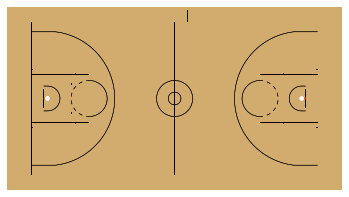

In [27]:
WNBACourt().draw()